# Modelo conversacional de un ChatBot

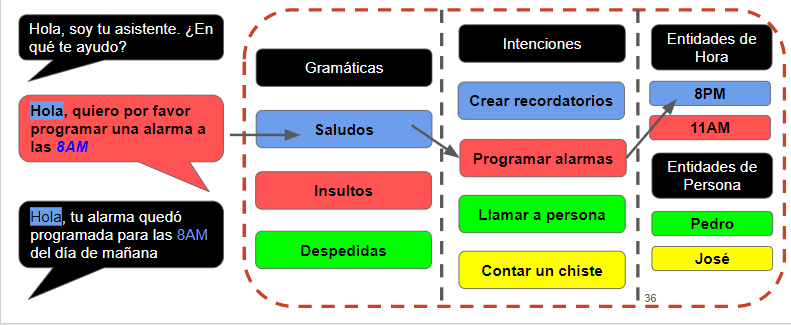

# Sección 01.- Autenticación en Googlr Drive, Declaración de librerías y Lectura de Utterances / Tags

In [ ]:
# Líneas necesarias para la autenticación del usuario en su cuenta de Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


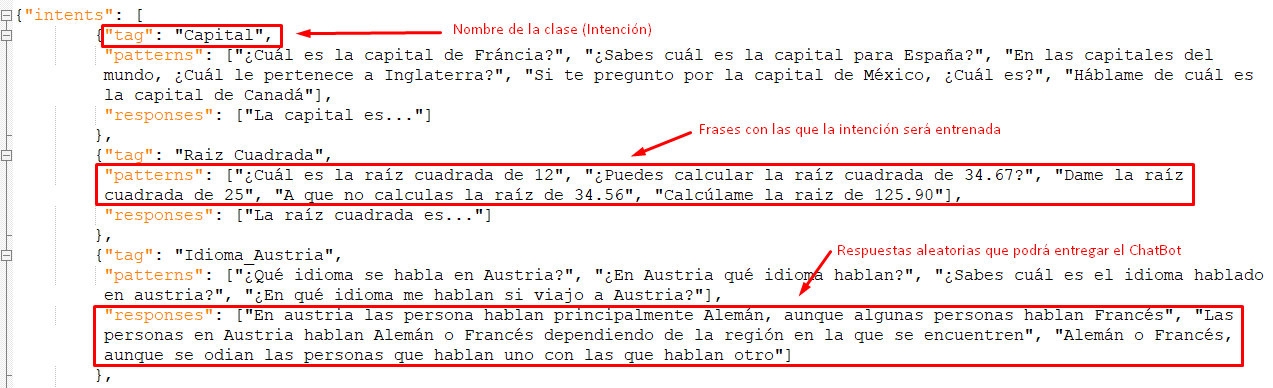

In [ ]:
# Declaración de librerías
import nltk #Natural languaje toolkit: herramientas para procesamiento de lenguaje
import numpy
import tensorflow
import random
import json

# Lectura de .json con los intents y las respuestas de cada clase
with open('/content/drive/My Drive/Intentiones.json', encoding='utf-8') as file:
    data = json.load(file)

#Etquetas o categorias
labels = []
#Frases para entrenar cada uno de los labels
texts = []

# Recopilación de textos para cada clase 
for intent in data['intents']:
    for pattern in intent['patterns']:
        texts.append(pattern)   
        
    # Creamos una lista con los nombres de las clases
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
print(texts)

['¿Fraciapa Uma llaqtan mayqantaq?', '¿Españapa Uma llaqtan mayqantaq, mayankiku?', 'Pachapa Uma llaqtankunachu, ¿Inglaterrapa mayqantaq?', 'Mexikupa Uma llaqtanpaq tapupti, ¿mayqantaq?', 'Canadapa Uma llantan mayqantaq, rimamuy', 'Tantiyay sapin chunka iskayniyuq 12', 'Atiyniyuq kay tantiyay pisi kinsa chunka tawayoq soqta chunka qanchisniyoq 34.67', 'Quy pisi iskay chunka pisqayoq 25', 'Manan tantiyay kinsa chunka tawayoq pisqa chunka soqtayoq 34.56', 'Tantiyay pisi pachak iskay chunka pisqa isqon chunka 125.90', 'Ima runasimita parlanqu Austriapi?', 'Austriapi ima runasimita parlanqu?', 'Yachanqichu ima runasimita parlanqu Austriapi?', "Ima runasimipin parlawanqiman noq'a Austriaman riqti?", 'Uywa hatun pacha?', 'Yachay uywa hatun pacha?', 'Pi pacha uywa hatun?', 'Niy uywa hatun puriq quyllur?', '¿Imay sut’i ADN?', '¿Imay sut’i pachak ADN?', '¿Pachak AND imarayku trulakuy?', '¿Atiyniyuq kay niy sut’i ADN?', 'imataq sutiqui', 'Ima shuti kanki?', 'iman nuilan cayanqui?', '¿May qam sut

# Sección 02.- Generación de vector de Salidas a partir de tags

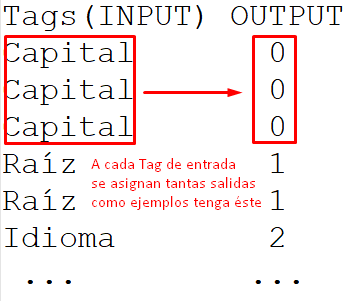

In [ ]:
# Generamos el vector de respuestas 
# (Cada clase tiene una salida numérica asociada)
output = []

for intent in data['intents']:
    for pattern in intent['patterns']:
        # El identificador de la clase es su índice
        # en la lista de clases o labels
        output.append(labels.index(intent['tag']))
    
print("Vector de salidas Y:")
print(output)

# Declaramos librería para convertir el vector de salida en una 
# matriz categórica gracias a Keras
from keras.utils.np_utils import to_categorical 

# Generamos la matriz de salidas(output) y el num de clases cuantos labels tenga
train_labels = to_categorical(output, num_classes=len(labels))
#Ahora nos saldrá la matriz tipo interruptor para sber dónde estamos
print('Matriz de salidas')
print(train_labels)

Vector de salidas Y:
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7]
Matriz de salidas
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0

# Sección 03.- Filtrado de StopWords y preprocesamiento de la información

In [ ]:
# Importamos librerías para el filtrado de StopWords y tokenización
import nltk
#nltk.download()
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
import re

stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


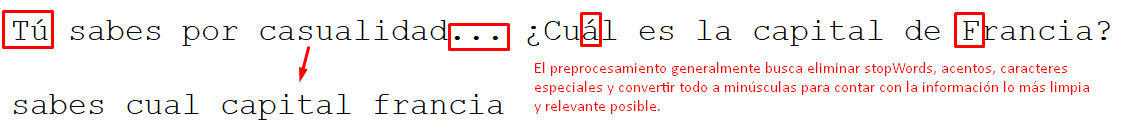

In [ ]:
# Para cada enunciado quitamos las StopWords
# También quitamos los acentos y filtramos signos de puntuación
X = []
for sen in texts:
    
    sentence = sen
    # Filtrado de stopword
    for stopword in stop_words:
        sentence = sentence.replace(" " + stopword + " ", " ")
    # sentence = sentence.replace("á", "a")
    # sentence = sentence.replace("é", "e")
    # sentence = sentence.replace("í", "i")
    # sentence = sentence.replace("ó", "o")
    # sentence = sentence.replace("ú", "u")
            
    # Remover espacios múltiples
    sentence = re.sub(r'\s+', ' ', sentence)
    # Convertir todo a minúsculas
    sentence = sentence.lower()
    # Filtrado de signos de puntuación
    tokenizer = RegexpTokenizer(r'\w+')
    # Tokenización del resultado
    result = tokenizer.tokenize(sentence)
    # Agregar al arreglo los textos "destokenizados" (Como texto nuevamente)
    X.append(TreebankWordDetokenizer().detokenize(result))

In [ ]:
# Imprimimos la lista de los enunciados que resultan
print(X)

['fraciapa uma llaqtan mayqantaq', 'españapa uma llaqtan mayqantaq mayankiku', 'pachapa uma llaqtankunachu inglaterrapa mayqantaq', 'mexikupa uma llaqtanpaq tapupti mayqantaq', 'canadapa uma llantan mayqantaq rimamuy', 'tantiyay sapin chunka iskayniyuq 12', 'atiyniyuq kay tantiyay pisi kinsa chunka tawayoq soqta chunka qanchisniyoq 34 67', 'quy pisi iskay chunka pisqayoq 25', 'manan tantiyay kinsa chunka tawayoq pisqa chunka soqtayoq 34 56', 'tantiyay pisi pachak iskay chunka pisqa isqon chunka 125 90', 'ima runasimita parlanqu austriapi', 'austriapi ima runasimita parlanqu', 'yachanqichu ima runasimita parlanqu austriapi', 'ima runasimipin parlawanqiman noq a austriaman riqti', 'uywa hatun pacha', 'yachay uywa hatun pacha', 'pi pacha uywa hatun', 'niy uywa hatun puriq quyllur', 'imay sut i adn', 'imay sut i pachak adn', 'pachak and imarayku trulakuy', 'atiyniyuq kay niy sut i adn', 'imataq sutiqui', 'ima shuti kanki', 'iman nuilan cayanqui', 'may qam sutichay', 'may atiy waqyay qam', 

# Sección 04.- Creación de matrices numéricas para las entradas + Padding

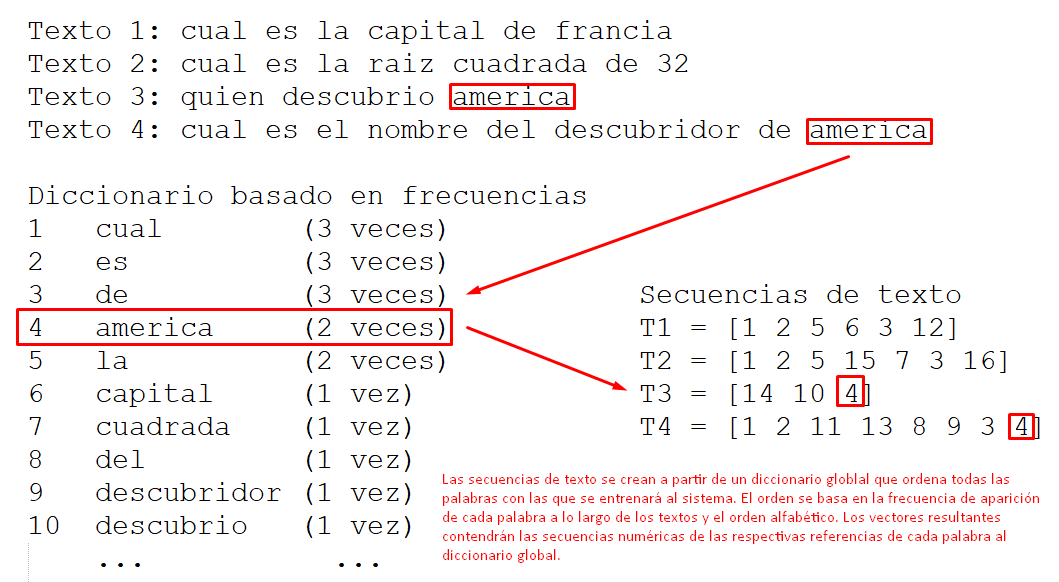

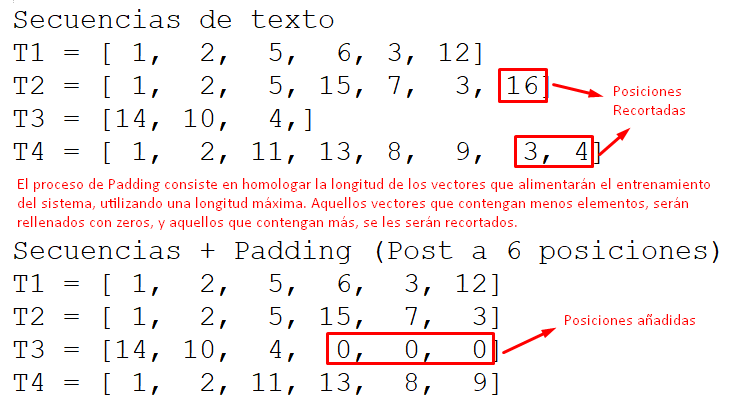

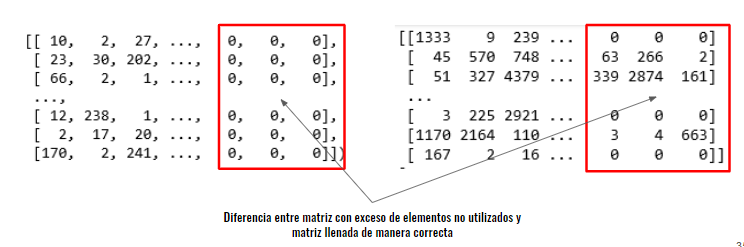

In [ ]:
#Padding para hacer los vectores del mismo tamaño
# Importamos la librería para generar la matriz de entrada de textos
# (Importamos pad_sequences y texts_to_sequences para proceso de padding)
from keras.preprocessing.sequence import pad_sequences

# Cantidad de palabras máximas por vector de entrada, es un parámtero sacando el promedio o calculando diferentes parámetros.
maxlen_user = 5

# Preparamos el "molde" para la crear los vectores de secuencia de palabras, DIFERENTES PALABRAS QUE VIENEN DE TODO EL TEXTO
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Transforma cada texto en una secuencia de valores enteros
X_seq = tokenizer.texts_to_sequences(X)

# Especificamos la matriz (Con padding de posiciones iguales a maxlen)
X_train = pad_sequences(X_seq, padding='post', maxlen=maxlen_user)

print("Matriz de entrada:")
print(X_train)

Matriz de entrada:
[[ 43   2  24   3   0]
 [ 44   2  24   3  45]
 [ 46   2  47  48   3]
 [ 49   2  50  51   3]
 [ 52   2  53   3  54]
 [  9  55   1  56  57]
 [ 58   1  59  28  60]
 [ 14  29   1  62  63]
 [ 30   1  65  28  66]
 [ 30  67   1  68  69]
 [  4  16  17  18   0]
 [ 18   4  16  17   0]
 [ 70   4  16  17  18]
 [ 72  73  74  75  76]
 [ 10  11  19   0   0]
 [ 31  10  11  19   0]
 [ 77  19  10  11   0]
 [ 32  10  11  78  79]
 [ 33  20  21  22   0]
 [ 33  20  21  15  22]
 [ 15  80  81  82   0]
 [ 13  32  20  21  22]
 [ 83  84   0   0   0]
 [  4  23  85   0   0]
 [ 86  87  88   0   0]
 [ 34  35  89   0   0]
 [ 34  90  91  35   0]
 [ 92  36   0   0   0]
 [ 93  23  94   0   0]
 [ 95  37  96  23   0]
 [ 38   5  39  12  40]
 [ 97  38   5  39  98]
 [ 41   5  12   0   0]
 [ 41   5  13  12  40]
 [  5  12   0   0   0]
 [ 42   6   7   8   0]
 [ 31  42   6   7   8]
 [ 99 100   6   7   8]
 [101 102   6   7   8]
 [103 104   6   7   8]]


# Sección 05.- Uso de Word Embeddings

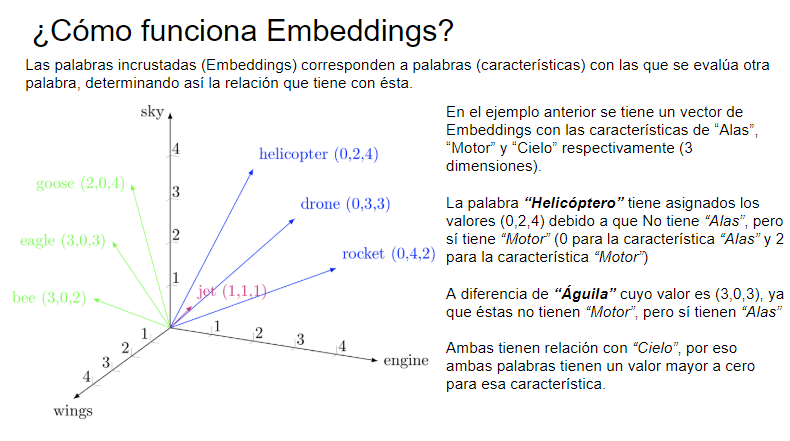

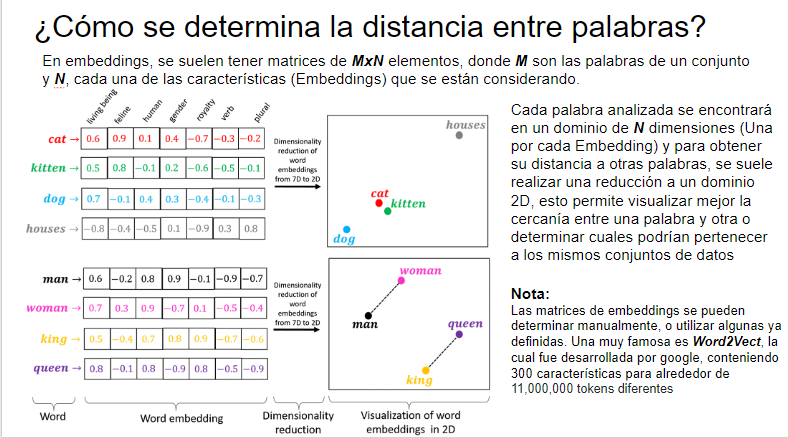

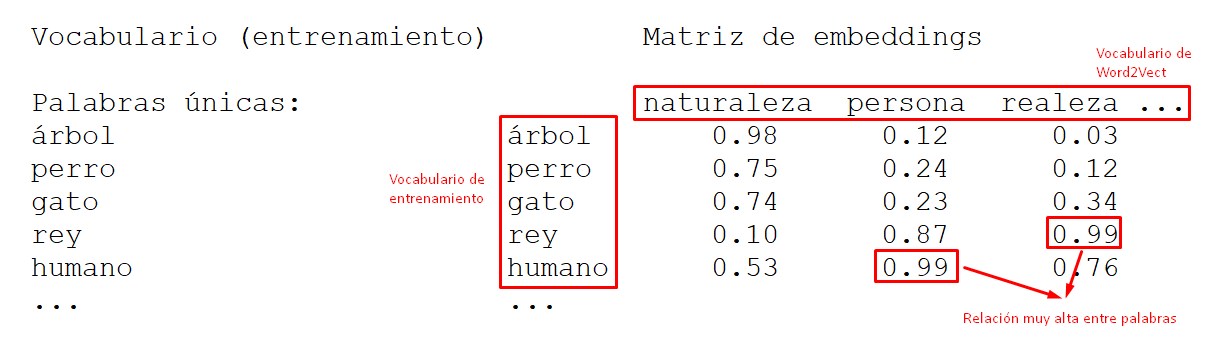

In [ ]:
# Declaración de librerías para manejo de arreglos (Numpy)
from numpy import asarray
from numpy import zeros

# Lectura del archivo de embeddings
embeddings_dictionary = dict()
Embeddings_file = open('/content/drive/My Drive/Word2Vect_Quechua.txt', encoding="utf8")

# Extraemos las características del archivo de embeddings
# y las agregamos a un diccionario (Cada elemento es un vextor)
for linea in Embeddings_file:
  #Leer lineas, extraer caracteristicas, 
    caracts = linea.split()
    palabra = caracts[0]
    vector = asarray(caracts[1:], dtype='float32')
    embeddings_dictionary [palabra] = vector
Embeddings_file.close()

In [ ]:
# Extraemos la cantidad de palabras en el vocabulario, empieza en 0
vocab_size = len(tokenizer.word_index) + 1

#Matriz filas: frases de entrenamiento, columnas, palabras de vocabulrio, atrás embeddings
# Generamos la matriz de embeddings (Con 300 Características)
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    # Extraemos el vector de embedding para cada palabra
    embedding_vector = embeddings_dictionary.get(word)
    # Si la palbra si existía en el vocabulario
    # agregamos su vector de embeddings en la matriz
    #Si la palabra existe en el vocabulario, que la añada a la matriz
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Sección 6.- Arquitectura de Red Neuronal 

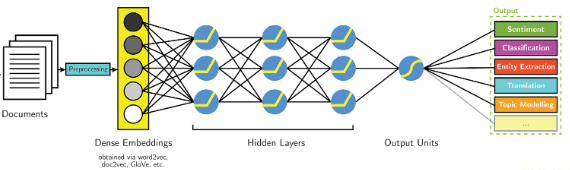

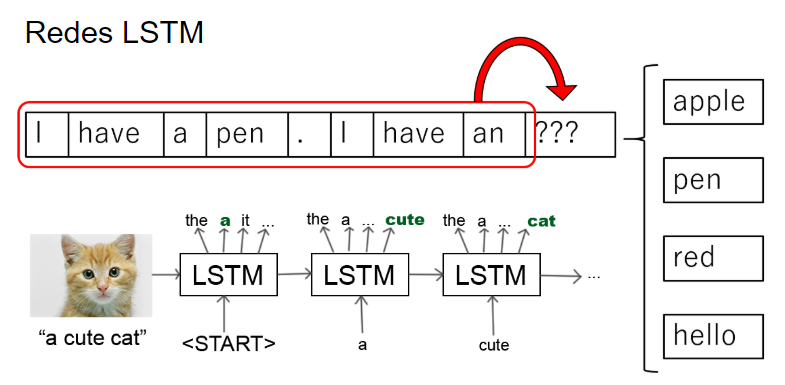

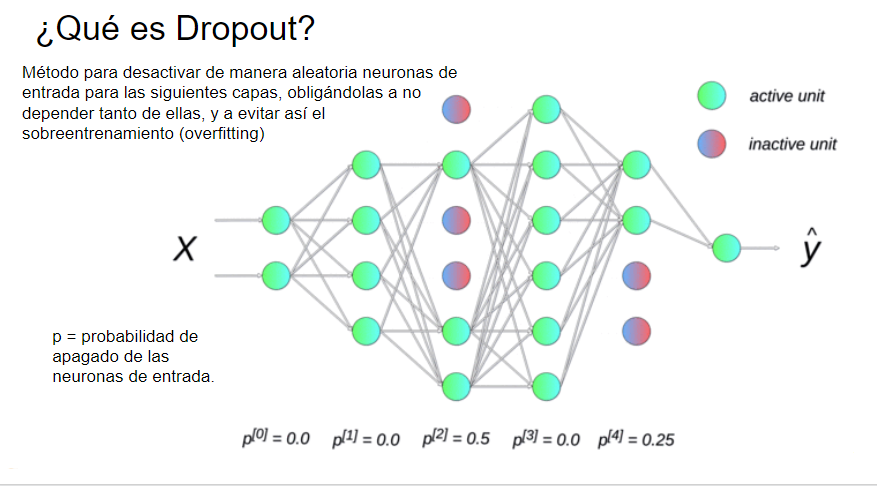

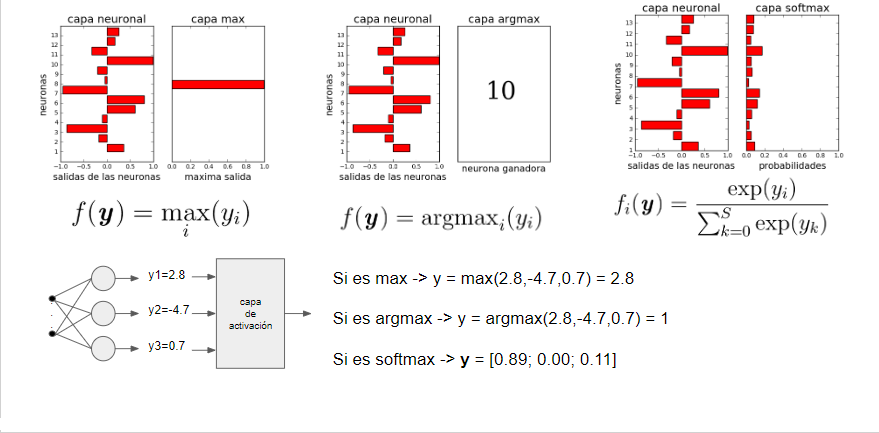

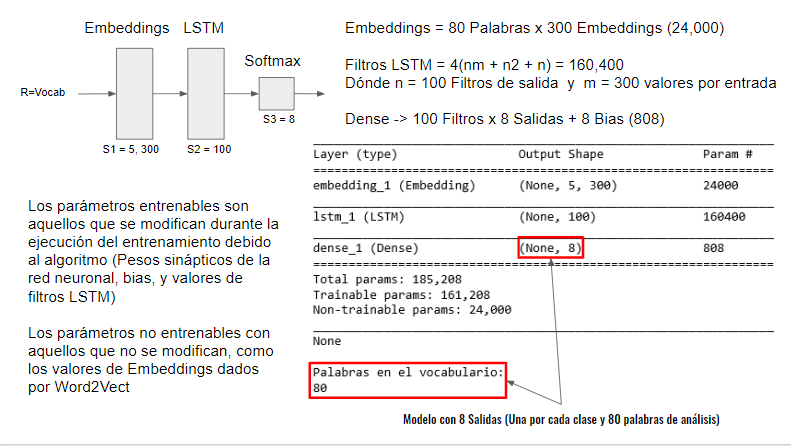

In [ ]:
# Declaración de modelo Secuencial 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

# Declaración de las capas del modelo LSTM
model = Sequential()
#Definir capa de embeddings y decir cuantas palabras diferentes va a contener las embedings (el tamaño del vocabulario) 300 características
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=X_train.shape[1] , trainable=False)
model.add(embedding_layer)
#LSTM: Almacenar filtros de memoria que va primero y después, mientras más filtros, más compleja de analizar y susceptible al sobreentrenamiento
#Dropout desconectar neurona con posibilidad de 20%
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#Todas las salidas conectadas para conocer el score
model.add(Dense(len(labels), activation='softmax'))

# Compilación del modelo, que calcule el error o lo diferente al resultado esperado vs lo obtenido con una entropia categórica, mientras más desorden hay entre las clases con alto score y bajo score.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

print("\nPalabras en el vocabulario:")
print(vocab_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 300)            31500     
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 8)                 808       
Total params: 192,708
Trainable params: 161,208
Non-trainable params: 31,500
_________________________________________________________________
None

Palabras en el vocabulario:
105


# Sección 7.- Entrenamiento de la red neuronal

In [ ]:
# Ajuste de los datos de entrenamiento al modelo creado
history = model.fit(X_train, train_labels, epochs=30, batch_size=8, verbose=1)

# Cálculo de los procentajes de Eficiencia y pérdida 
score = model.evaluate(X_train, train_labels, verbose=1)
print("\nTest Loss:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/30
5/5 [==============================] - 25s 13ms/step - loss: 2.0767 - accuracy: 0.0910
Epoch 2/30
5/5 [==============================] - 0s 18ms/step - loss: 2.0443 - accuracy: 0.3438
Epoch 3/30
5/5 [==============================] - 0s 15ms/step - loss: 2.0031 - accuracy: 0.7201
Epoch 4/30
5/5 [==============================] - 0s 14ms/step - loss: 1.9758 - accuracy: 0.6934
Epoch 5/30
5/5 [==============================] - 0s 17ms/step - loss: 1.9235 - accuracy: 0.6861
Epoch 6/30
5/5 [==============================] - 0s 12ms/step - loss: 1.9042 - accuracy: 0.7188
Epoch 7/30
5/5 [==============================] - 0s 12ms/step - loss: 1.8079 - accuracy: 0.7955
Epoch 8/30
5/5 [==============================] - 0s 12ms/step - loss: 1.7239 - accuracy: 0.7076
Epoch 9/30
5/5 [==============================] - 0s 12ms/step - loss: 1.6139 - accuracy: 0.6198
Epoch 10/30
5/5 [==============================] - 0s 11ms/step - loss: 1.5529 - accuracy: 0.6715
Epoch 11/30
5/5 [===========

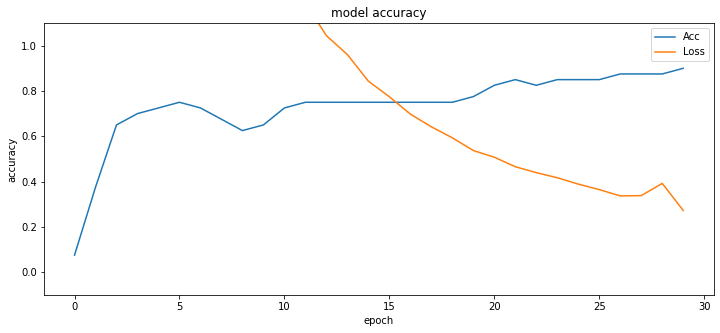

In [ ]:
# Finalmente imprimimos la eficiencia y la pérdida del modelo
# época a época para ver su evolución
import matplotlib.pyplot as plt

# Parámetros de ploteo para la gráfica
plt.figure(figsize=(12,5))
plt.ylim(-0.1, 1.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Acc','Loss'])
plt.show()

# Sección 8.- Prueba del modelo de Chatbot

## 8.1.- Instanciador

In [ ]:
# Módulo instanciador de entradas para el chatbot
# (Convierte el texto de entrada en la secuencia de
# valores enteros con pad_sequences, elimina signos
# de interrogación y acentos)
def Instancer(inp):  
    inp = inp.lower()
    inp = inp.replace("’a", "a")
    inp = inp.replace("’e", "e")
    inp = inp.replace("’i", "i")
    inp = inp.replace("’o", "o")
    inp = inp.replace("’u", "u")
    inp = inp.replace("¿", "")
    inp = inp.replace("?", "")
    inp = inp.replace("ä", "a")
    inp = inp.replace("ë", "e")
    inp = inp.replace("ï", "i")
    inp = inp.replace("ö", "o")
    inp = inp.replace("ü", "u")
    inp = inp.replace("¿", "")
    inp = inp.replace("?", "")
    txt = [inp]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=maxlen_user)
    return padded

## 8.2.- Gramáticas Débiles

In [ ]:
# Módulo de detección de gramáticas débiles
Saludos_In = ["Allin p'unchay", "Allin sukhayay", "Imaynalla", "Waliqllachu", "Allin chísi", "Cómo te va"]
Despedidas_In = ["Tinkunakamas", "Q'ayakama", "Minchhakama", "Askamalla", "Waq kutikama", "Tupananchukkama", "Rishaqna", "Huk punchawkama", "Huk Kutikama", "Paqarinkama", "Rishaqna"]
Gracias_In = ["Payji, yusul payji", "Payji, allintami willamayanki", "Añay", "Sulpaiky", "Yupaychayki", "Añay Qanpaqpas", "Añay, Yusulpayki imamanta"]
InsD = [Saludos_In, Despedidas_In, Gracias_In]

Saludos_Out = ["Imaynalla kashanki tatay", "¿Imatataq ministinki?", "¿Imata munanki? ", "Imanashaykitaq"]
Despedidas_Out = ["Riyanina, ratukaman", "Arí, allaqkaman", "Tinkunakamas", "Q'ayakama", "Minchhakama", "Askamalla", "Waq kutikama", "Tupananchukkama", "Huk punchawkama", "Huk Kutikama", "Paqarinkama"]
Gracias_Out = ["Khasi malliy", "Ashqata malliy atiyniyuq kay yanapay", "Khasi, capac chay kani", "Chaynulamapis"]
OutsD = [Saludos_Out, Despedidas_Out, Gracias_Out]

def Weak_grammars(inp):
    index = 0
    weak_act = 0
    for categoria in InsD:
        for gramatica in categoria:
            if inp.lower().count(gramatica.lower()) > 0:
                weak_act = 1
                print('\nChatBot: ' + random.choice(OutsD[index]) + ' [Gramática Débil]\n')
        index += 1
    return weak_act
    

## 8.2.- Gramáticas fuertes

In [ ]:
# Módulo de detección de gramáticas fuertes
Insultos_In = ["Waqsu kiru", "Waqati", "Wiksa sapa", "Winku ñawi"]
Fan_In = ["Harry Potter", "Juego de tronos", "El señor de los anillos"]
InsF = [Insultos_In, Fan_In]

Insultos_Out = ["Waqrasapa", "Mocoso", "Puñuy siki", "Ama chayta ruraychu"]
Fan_Out = ["Alkay, altu, atahay aswanta, parlay liwru, waylluy",
           "chiqap manan uyarini niy hawa ñuqa qampas ñuqa qillqara"]
OutsF = [Insultos_Out, Fan_Out]

def Strong_grammars(inp):
    index = 0
    strong_act = 0
    for categoria in InsF:
        for gramatica in categoria:
            if inp.lower().count(gramatica.lower()) > 0:
                strong_act = 1
                print('\nChatBot: ' + random.choice(OutsF[index]) + ' [Gramática Fuerte]\n')
        index += 1
    return strong_act

## 8.3.- Reconocimiento de entidades

In [ ]:
# Módulo de reconocimiento de entidad País
Paises = {'Mishiku': 'Mishiku llaqta', 'Fransiya': 'París', 'Ispaña': 'Madrid', 'Españapa': 'Madrid', 'Inglaterra': 'Londres', 'Italya': 'Roma','Canada':'Ottawa'}
#Paises = {'México': 'México', 'Francia': 'París', 'España': 'Madrid', 'Inglaterra': 'Londres', 'Italia': 'Roma'}
Resp_Paises = ['wan mayna allinmi sumaq kay killakunapim watakama', #y es hermoso en esta época del año 
               'Munaymanm yachay rikuy', #me encantaría poder visitarla
               'puriy Chatbots yachay watuku nacionkunapiqa yanqa qawanapaq'] #lástima que los ChatBots solo podemos hacer visitas a paises de manera virtual
Paises_Unknown = ['puriy mana  yachayanichu uma llaqta nacionkunapiqa, Rishaq estudiay #Chatbot saqra', #Lo siento pero creo que no conozco la capital de ese país, creo que debo estudiar más #Mal ChatBot
                  'Pampachakuy, ama Chusay Llahta, ama Ruwaysiy mayqantaq Llahta', # Creo que dirás que soy chafa, pero no me sé esa capital, pero pregunta por otra   
                  'Puriy mana  yachayanichu estudiay allpa saywachi yanapayuq chaykunaqa'] #Creo que me pondré a estudiar Geografía, para que pueda responderte en un futuro 

def Country(inp):
    pais_act = 0
    for pais in Paises.keys():
        if inp.lower().count(pais.lower()) > 0:
            pais_act = 1
            print('\nChatBot: ' + 'Uma llanqta ' + str(pais) + ' kay ' + str(Paises.get(pais)) + ' ' + random.choice(Resp_Paises) + '[Entidad]\n')
    if pais_act == 0:
        print('\nChatBot: ' + random.choice(Paises_Unknown) + '\n')
        

In [ ]:
# Módulo de reconocimiento de entidad Número
import re
import math

Resp_Raiz = ['Chiqap kay Umayux?',
             'Chiqap kay pi Yupay yacha-Mushuk Shimikuna :D',
             'Imatataq yachatsikuyarqan Ingeniero punta qateqninkuna :D',
             '¡Kananqa Mushuk Shimikuna alläpam gustëkun!']
#Si usted reconoce sus errores, sus hijos lo respetarán más-Imatapis
Raiz_Unknown = ['Mana yaqqa intrakanichu, Pantasha kani', 'Mana Intrakankichu rimashaytaqa, Pantasha kani'
                'Imatapis pantarirqa humildim kanëki y manam tsapäkunëkitsu, tsënöpam wamrëkikuna mas respetayäshunki :)',
                'Chaywanpis wakkuna juchachakuptinku, ñawpaqta apaqkuna juchachakuptinku ima, mana juchachakunallataqchu tiyan :('
                'Mana puytinichu.'] 

def Raiz(inp):
    num_act = 0
    num = re.search(r'(\d+)', inp.lower())
    if num != None:
        num_act = 1
        print('\nChatBot: ' + 'Sapin chunka ' + num.group() + ' kay ' + str(round(math.sqrt(float(num.group())), 2)) + ' ' + random.choice(Resp_Raiz) + '[Entidad]\n')
    if num_act == 0:
        print('\nChatBot: ' + random.choice(Raiz_Unknown) + '\n')

## 8.4.- Lógica conversacional

In [ ]:
# Función de funcionamiento para el ChatBot
def chat():
    print("\nChatBot: Rimaycamuyki, Kay suteyqa ChatBot, Qallariy Thawtiy Këtaqa\n")
    while True:
        inp = input("     Tú: ")
        
        # Instrucción de fin de conversación (Cierra el proceso)
        if inp.lower() == "salir":
            break
        
        # La gramática fuerte es dominante (Si aparece no es necesario)
        # evaluar la intención
        Strong = Strong_grammars(inp)
        if Strong == 0:
            # De cada entrada al sistema (inp) clasificación según el
            # modelo creado y asignación de un tag (Categoría)
            # se usa argmax para regresar aquel que tiene mayor peso
            results = model.predict(Instancer(inp))
            results_index = numpy.argmax(results)
            tag = labels[results_index]
            # Valor de la clase con mayor score
            maxscore = numpy.max(results)
            print('Score del intent: ' + str(maxscore))

            # Con base en el tag se le asigna la intención del usuario
            for tg in data["intents"]:
                if tg['tag'] == tag:
                    responses = tg['responses']

            # Respuesta de la gramática débil
            weak = Weak_grammars(inp)

            # Elegir una respuesta aleatoria de la Response Pool (Si se supera el umbral)
            if maxscore > 0.5:
                # Si se detecta una intención que esté asociada a entidades se envía a
                # su respectivo módulo
                if tag == "Capital":
                    Country(inp)
                elif tag == "Raiz_Cuadrada":
                    Raiz(inp)
                else:
                    print('\nChatBot: ' + str(random.choice(responses)) + ' [' + str(tag) + ']\n')
            else:
                if weak == 0:
                    print('\nImaraq, ama intraka, ¿Tapuy mushuq puytinkichu?\n')

In [ ]:
print('Categorías del ChatBot:')
print('Categorías: ' + str(labels) + '\n')

# Activar el ChatBot
chat()

Categorías del ChatBot:
Categorías: ['Capital', 'Raiz_Cuadrada', 'Idioma_Austria', 'Animal_mas_grande', 'ADN', 'Nombre', 'Paises_Europa', 'Critobal_Colon']


ChatBot: Rimaycamuyki, Kay suteyqa ChatBot, Qallariy Thawtiy Këtaqa

     Tú: ¿Fransiya Uma llaqtan mayqantaq?
Score del intent: 0.94121933

ChatBot: Uma llanqta Fransiya kay París Munaymanm yachay rikuy[Entidad]

     Tú: Fransiya
Score del intent: 0.5400588

ChatBot: ¿Imaynalla Kashanki?, ¿Imaynalla Kashanki? [Nombre]

     Tú: Tantiyay sapin chunka iskayniyuq 12
Score del intent: 0.7670503

ChatBot: Sapin chunka 12 kay 3.46 Chiqap kay Umayux?[Entidad]

     Tú: Tantiyay sapin chunka iskayniyuq 36
Score del intent: 0.669864

ChatBot: Sapin chunka 36 kay 6.0 ¡Kananqa Mushuk Shimikuna alläpam gustëkun![Entidad]

     Tú: Atiyniyuq kay tantiyay pisi kinsa chunka tawayoq soqta chunka qanchisniyoq 36
Score del intent: 0.5400588

ChatBot: Ñuca BotGrupo1 kani [Nombre]

     Tú: Quy pisi iskay chunka pisqayoq 25
Score del intent: 0.7399

IMPLEMENTANDO FLASK

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask, jsonify, request, render_template
from flask_ngrok import run_with_ngrok
import pandas as pd
import json
import requests
from flask import Flask, send_file
from flask_ngrok import run_with_ngrok

In [ ]:
app = Flask(__name__, template_folder="/content/drive/My Drive")
run_with_ngrok(app)

@app.route("/")
def hello_world():
  return render_template("home.html")

@app.route("/get") 
def get_bot_response():
  usertext = request.args.get('msg')
  return Country(usertext)


  ##return usertext

app.run()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')